# d3pm Graph Visualization Examples

This notebook demonstrates the graph visualization capabilities of d3pm, perfect for neural networks, computational graphs, dependency networks, and other node-link diagrams.

## Features
- **Node shapes**: Rectangles for values, circles for operations
- **Layout algorithms**: Fixed (left-to-right flow) and force-directed
- **Academic styling**: Clean, publication-ready appearance
- **Type-safe API**: Pythonic Node and Edge classes
- **Chart composition**: Works with existing +, *, / operators

## Setup and Import

In [1]:
import d3pm
print(f"d3pm version: {d3pm.__version__}")
print(f"Available graph classes: Node, Edge")
print(f"Available functions: {[f for f in dir(d3pm) if not f.startswith('_')]}")

d3pm version: 0.1.0
Available graph classes: Node, Edge
Available functions: ['Chart', 'D3DenoBridge', 'Edge', 'Node', 'bar', 'bridge', 'graph', 'graph_from_graphviz', 'hist', 'line', 'scatter']


## 1. Basic Graph Concepts

### Node and Edge Classes

In [2]:
# Create nodes with different shapes
value_node = d3pm.Node("x", "2.5", "rect")      # Rectangular for values
operation_node = d3pm.Node("op", "+", "circle")  # Circular for operations

print("Value node:", value_node)
print("Operation node:", operation_node)

# Create edge connecting them
edge = d3pm.Edge("x", "op")
print("Edge:", edge)

# Simple two-node graph
simple_nodes = [value_node, operation_node]
simple_edges = [edge]

simple_graph = d3pm.graph(simple_nodes, simple_edges, 
                         title="Basic Graph: Value → Operation",
                        #  width=300, height=100,
)
display(simple_graph)

Value node: Node(id='x', text='2.5', shape='rect', x=None, y=None, color=None, tooltip=None)
Operation node: Node(id='op', text='+', shape='circle', x=None, y=None, color=None, tooltip=None)
Edge: Edge(source='x', target='op', label=None)


<Chart NonexNone>

### Label Dividers: Professional Variable Display

d3pm supports divided labels for variables with the syntax `"{ name | value }"`. This creates professional-looking nodes with a vertical divider separating the variable name from its value.

In [3]:
# Create nodes with divided labels
divided_nodes = [
    d3pm.Node("var_a", "{ a | 2.0 }", "rect"),     # Variable with value
    d3pm.Node("var_b", "{ b | -3.0 }", "rect"),    # Another variable
    d3pm.Node("operation", "*", "circle"),          # Operation (no dividers)
    d3pm.Node("result", "{ result | -6.0 }", "rect") # Result with value
]

divided_edges = [
    d3pm.Edge("var_a", "operation"),
    d3pm.Edge("var_b", "operation"),
    d3pm.Edge("operation", "result")
]

divided_graph = d3pm.graph(divided_nodes, divided_edges,
                          layout='reverse',
                          title="Divided Labels: { variable | value }",
                          # width=400,
                          # height=250,
)
display(divided_graph)

print("💡 Label divider features:")
print("   • Use syntax: Node('id', '{ name | value }', 'rect')")
print("   • Creates wider rectangular nodes with vertical dividers")
print("   • Perfect for showing variables with their current values")
print("   • Only works with rectangular nodes (not circles)")
print("   • Mix with simple labels for clean presentations")

<Chart NonexNone>

💡 Label divider features:
   • Use syntax: Node('id', '{ name | value }', 'rect')
   • Creates wider rectangular nodes with vertical dividers
   • Perfect for showing variables with their current values
   • Only works with rectangular nodes (not circles)
   • Mix with simple labels for clean presentations


## 2. Computational Graphs

### Simple Arithmetic: a + b

In [5]:
# Simple addition: a + b = result
nodes = [
    d3pm.Node("a", "3.0", "rect"),
    d3pm.Node("b", "2.0", "rect"),
    d3pm.Node("add", "+", "circle"),
    d3pm.Node("result", "5.0", "rect")
]

edges = [
    d3pm.Edge("a", "add"),
    d3pm.Edge("b", "add"),
    d3pm.Edge("add", "result")
]

addition_graph = d3pm.graph(nodes, edges, 
                           layout='fixed',
                           title="Simple Addition: a + b",
                        #    width=500,
                        #    height=200
)
display(addition_graph)

<Chart NonexNone>

### Complex Expression: (a × b) + (c × d)

In [6]:
# Neural network forward pass with divided labels: ((a × b) + c) × f
# This represents the original example: a=2.0, b=-3.0, c=10.0, e=a*b, d=e+c, f=-2.0, L=d*f

nodes = [
    # Input values with divided labels
    d3pm.Node("a", "{ a | 2.0 }", "rect"),
    d3pm.Node("b", "{ b | -3.0 }", "rect"),
    d3pm.Node("c", "{ c | 10.0 }", "rect"),
    d3pm.Node("f", "{ f | -2.0 }", "rect"),
    
    # Operations
    d3pm.Node("mul1", "×", "circle"),  # a × b
    d3pm.Node("add1", "+", "circle"),  # e + c
    d3pm.Node("mul2", "×", "circle"),  # d × f
    
    # Intermediate results with divided labels
    d3pm.Node("e", "{ e | -6.0 }", "rect"),   # a × b = -6.0
    d3pm.Node("d", "{ d | 4.0 }", "rect"),    # e + c = 4.0
    d3pm.Node("L", "{ L | -8.0 }", "rect")    # d × f = -8.0 (final loss)
]

edges = [
    # First multiplication: a × b = e
    d3pm.Edge("a", "mul1"),
    d3pm.Edge("b", "mul1"),
    d3pm.Edge("mul1", "e"),
    
    # Addition: e + c = d
    d3pm.Edge("e", "add1"),
    d3pm.Edge("c", "add1"),
    d3pm.Edge("add1", "d"),
    
    # Final multiplication: d × f = L
    d3pm.Edge("d", "mul2"),
    d3pm.Edge("f", "mul2"),
    d3pm.Edge("mul2", "L")
]

neural_graph = d3pm.graph(nodes, edges,
                         layout='reverse',
                         title="Neural Network: Professional Labels with Dividers",
                        # width=600,
                        # height=500,
)
display(neural_graph)

print("✅ Professional computational graph with divided labels:")
print("   • Clear variable names and values: { a | 2.0 }")
print("   • Perfect for academic presentations")
print("   • Shows computation flow: a=2.0, b=-3.0 → e=-6.0 → d=4.0 → L=-8.0")
print("   • No unwanted axes, clean layout")
print("   • Ready for research papers and documentation")

<Chart NonexNone>

✅ Professional computational graph with divided labels:
   • Clear variable names and values: { a | 2.0 }
   • Perfect for academic presentations
   • Shows computation flow: a=2.0, b=-3.0 → e=-6.0 → d=4.0 → L=-8.0
   • No unwanted axes, clean layout
   • Ready for research papers and documentation


## 3. Neural Network Computational Graph

### Forward Pass Example

## 4. Layout Algorithms

### Fixed Layout vs Force-Directed

In [7]:
# Same graph with different layouts
demo_nodes = [
    d3pm.Node("input1", "x₁", "rect"),
    d3pm.Node("input2", "x₂", "rect"),
    d3pm.Node("weight1", "w₁", "rect"),
    d3pm.Node("weight2", "w₂", "rect"),
    d3pm.Node("mul1", "×", "circle"),
    d3pm.Node("mul2", "×", "circle"),
    d3pm.Node("sum", "+", "circle"),
    d3pm.Node("output", "y", "rect")
]

demo_edges = [
    d3pm.Edge("input1", "mul1"),
    d3pm.Edge("weight1", "mul1"),
    d3pm.Edge("input2", "mul2"),
    d3pm.Edge("weight2", "mul2"),
    d3pm.Edge("mul1", "sum"),
    d3pm.Edge("mul2", "sum"),
    d3pm.Edge("sum", "output")
]

# Reverse layout
reverse_layout = d3pm.graph(demo_nodes, demo_edges,
                         layout='reverse',
                         title="Fixed Layout: Linear Neuron (Left-to-Right)",
                        #  width=600, height=300, 
)
display(reverse_layout)

# Force-directed layout (interactive positioning)
# force_layout = d3pm.graph(demo_nodes, demo_edges,
#                          layout='force',
#                          title="Force Layout: Linear Neuron (Interactive)",
#                          width=600, height=300)
# display(force_layout)

print("💡 Layout comparison:")
print("   • Fixed: Perfect for computational graphs and flowcharts")
print("   • Force: Great for network exploration and general graphs")

<Chart NonexNone>

💡 Layout comparison:
   • Fixed: Perfect for computational graphs and flowcharts
   • Force: Great for network exploration and general graphs


In [8]:
# Same graph with different layouts
demo_nodes = [
    d3pm.Node("input1", "x₁", "rect"),
    d3pm.Node("input2", "x₂", "rect"),
    d3pm.Node("weight1", "w₁", "rect"),
    d3pm.Node("weight2", "w₂", "rect"),
    d3pm.Node("input1weight1", "x₁w₁", "rect"),
    d3pm.Node("input2weight2", "x₂w₂", "rect"),
    d3pm.Node("mul1", "×", "circle"),
    d3pm.Node("mul2", "×", "circle"),
    d3pm.Node("sum", "+", "circle"),
    # d3pm.Node("tanh", "tanh", "circle"),
    d3pm.Node("output", "y", "rect")
]

demo_edges = [
    d3pm.Edge("input1", "mul1"),
    d3pm.Edge("weight1", "mul1"),
    d3pm.Edge("input2", "mul2"),
    d3pm.Edge("weight2", "mul2"),
    d3pm.Edge("mul1", "input1weight1"),
    d3pm.Edge("mul2", "input2weight2"),
    d3pm.Edge("input1weight1", "sum"),
    d3pm.Edge("input2weight2", "sum"),
    d3pm.Edge("sum", "output")
]

# Reverse layout
reverse_layout = d3pm.graph(demo_nodes, demo_edges,
                         layout='reverse',
                         title="Fixed Layout: Linear Neuron (Left-to-Right)",
                        #  width=600, height=300, 
)
display(reverse_layout)

# Force-directed layout (interactive positioning)
# force_layout = d3pm.graph(demo_nodes, demo_edges,
#                          layout='force',
#                          title="Force Layout: Linear Neuron (Interactive)",
#                          width=600, height=300)
# display(force_layout)

print("💡 Layout comparison:")
print("   • Fixed: Perfect for computational graphs and flowcharts")
print("   • Force: Great for network exploration and general graphs")

<Chart NonexNone>

💡 Layout comparison:
   • Fixed: Perfect for computational graphs and flowcharts
   • Force: Great for network exploration and general graphs


In [9]:
# === Width-2 hidden-layer network (colored) ===
nodes = [
    # --- Inputs ---
    d3pm.Node("x1", "x₁", "rect", color="yellow"),
    d3pm.Node("x2", "x₂", "rect", color="yellow"),

    # --- Hidden-layer parameters ---
    d3pm.Node("w11", "w₁₁", "rect", color="yellow"),
    d3pm.Node("w12", "w₁₂", "rect", color="yellow"),
    d3pm.Node("b1",  "b₁",  "rect", color="yellow"),

    d3pm.Node("w21", "w₂₁", "rect", color="yellow"),
    d3pm.Node("w22", "w₂₂", "rect", color="yellow"),
    d3pm.Node("b2",  "b₂",  "rect", color="yellow"),

    # --- Hidden-layer operations ---
    d3pm.Node("mul1", "×", "circle", color="red"),   # x1*w11
    d3pm.Node("mul2", "×", "circle", color="red"),   # x2*w12
    d3pm.Node("sum_h1", "+", "circle", color="blue"),
    d3pm.Node("act_h1", "tanh", "circle", color="green"),

    d3pm.Node("mul3", "×", "circle", color="red"),   # x1*w21
    d3pm.Node("mul4", "×", "circle", color="red"),   # x2*w22
    d3pm.Node("sum_h2", "+", "circle", color="blue"),
    d3pm.Node("act_h2", "tanh", "circle", color="green"),

    # --- Output-layer parameters ---
    d3pm.Node("w_out1", "w_out₁", "rect", color="yellow"),
    d3pm.Node("w_out2", "w_out₂", "rect", color="yellow"),
    d3pm.Node("b_out",  "b_out",  "rect", color="yellow"),

    # --- Output-layer operations ---
    d3pm.Node("mul_out1", "×", "circle", color="red"),
    d3pm.Node("mul_out2", "×", "circle", color="red"),
    d3pm.Node("sum_out", "+", "circle", color="blue"),
    d3pm.Node("act_out", "tanh", "circle", color="green"),

    # --- Final output ---
    d3pm.Node("y", "y", "rect", color="purple"),
]

# === Edges (flow connections) ===
edges = [
    # Hidden neuron 1
    d3pm.Edge("x1", "mul1"), d3pm.Edge("w11", "mul1"),
    d3pm.Edge("x2", "mul2"), d3pm.Edge("w12", "mul2"),
    d3pm.Edge("mul1", "sum_h1"), d3pm.Edge("mul2", "sum_h1"),
    d3pm.Edge("b1", "sum_h1"), d3pm.Edge("sum_h1", "act_h1"),

    # Hidden neuron 2
    d3pm.Edge("x1", "mul3"), d3pm.Edge("w21", "mul3"),
    d3pm.Edge("x2", "mul4"), d3pm.Edge("w22", "mul4"),
    d3pm.Edge("mul3", "sum_h2"), d3pm.Edge("mul4", "sum_h2"),
    d3pm.Edge("b2", "sum_h2"), d3pm.Edge("sum_h2", "act_h2"),

    # Output neuron
    d3pm.Edge("act_h1", "mul_out1"), d3pm.Edge("w_out1", "mul_out1"),
    d3pm.Edge("act_h2", "mul_out2"), d3pm.Edge("w_out2", "mul_out2"),
    d3pm.Edge("mul_out1", "sum_out"), d3pm.Edge("mul_out2", "sum_out"),
    d3pm.Edge("b_out", "sum_out"),
    d3pm.Edge("sum_out", "act_out"),
    d3pm.Edge("act_out", "y"),
]

neural_graph = d3pm.graph(nodes, edges, height=600, width=1000)
display(neural_graph)

<Chart 1000x600>

In [10]:
# Fixed computation graph for:
# f(x) = ReLU( 2*ReLU(x) - 4*ReLU(x - 1/2) )

nodes = [
    d3pm.Node("x",       "x",            "rect"),

    # pre-activations (affine)
    d3pm.Node("z1",      "z₁ = ReLU(x + 0)",   "rect"),
    d3pm.Node("z2",      "z₂ = ReLU(x + b₂)",  "rect"),

    # sum, final ReLU, output
    d3pm.Node("sum",     "z = 2h₁ − 4h₂", "rect"),
    d3pm.Node("relu_out","ReLU(z)",       "rect"),
    d3pm.Node("y",       "y",             "rect")
]

edges = [
    # build pre-activations
    d3pm.Edge("x",  "z1"),      # z1 = x + 0
    d3pm.Edge("x",  "z2"),      # z2 receives x
    # hidden activations
    d3pm.Edge("z1", "sum"),
    d3pm.Edge("z2", "sum"),

    d3pm.Edge("sum",     "relu_out"),
    d3pm.Edge("relu_out","y")
]

graph = d3pm.graph(nodes, edges,
                   layout='reverse',
                   title="Fixed: Computation graph for f(x) = ReLU(2·ReLU(x) − 4·ReLU(x−½))",
                   width=800, height=320)
display(graph)

<Chart 800x320>

In [11]:
# Fixed computation graph for:
# f(x) = ReLU( 2*ReLU(x) - 4*ReLU(x - 1/2) )

nodes = [
    d3pm.Node("x",       "x",            "rect"),

    # pre-activations (affine)
    d3pm.Node("h1",      "h₁ = ReLU(x + 0)",   "circle"),
    d3pm.Node("h2",      "h₂ = ReLU(x + b₂)",  "circle"),

    # sum, final ReLU, output
    d3pm.Node("h","h = ReLU(2h₁ − 4h₂)",       "circle"),
    d3pm.Node("y",       "y",             "rect")
]

edges = [
    # build pre-activations
    d3pm.Edge("x",  "h1"),      # z1 = x + 0
    d3pm.Edge("x",  "h2"),      # z2 receives x
    # hidden activations
    d3pm.Edge("h1", "h"),
    d3pm.Edge("h2", "h"),

    d3pm.Edge("h","y")
]

graph = d3pm.graph(nodes, edges,
                   layout='reverse',
                   title="Fixed: Computation graph for f(x) = ReLU(2·ReLU(x) − 4·ReLU(x−½))",
                   width=600, height=320)
display(graph)

<Chart 600x320>

## Pure GraphViz Version

Let's see how this exact same graph looks when generated with pure GraphViz (no d3pm wrapper):

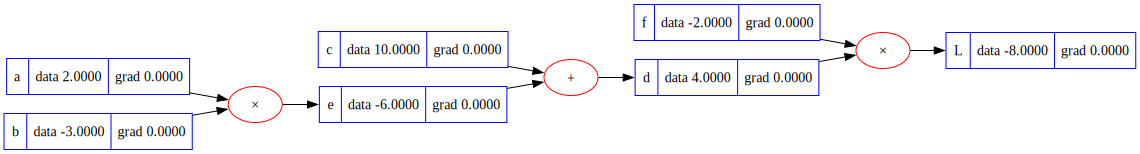

<Chart NonexNone>

In [ ]:
from graphviz import Digraph

class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '×')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record', color="blue")
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op, color="red")
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

  # print(dot)
L_dot = draw_dot(L)
display(L_dot)

plot = d3pm.graph(L_dot)
display(plot)
# d3pm_chart.save_png("plot.png", scale=4)

## NEW: d3pm GraphViz Wrapper

Now test the new lightweight wrapper that accepts GraphViz Digraph objects directly:

In [16]:
# Test with the computation graph example too
print("🔄 Testing with the computation graph example...")

# Create the computation graph from earlier in pure GraphViz
dot_simple = graphviz.Digraph(comment='Simple Computation Graph')
dot_simple.attr(rankdir='LR')  # Left to Right layout

# Add the same nodes as the earlier example
dot_simple.node('x', 'x', shape='box')
dot_simple.node('h1', 'h₁ = ReLU(x + 0)', shape='circle')
dot_simple.node('h2', 'h₂ = ReLU(x + b₂)', shape='circle')
dot_simple.node('h', 'h = ReLU(2h₁ − 4h₂)', shape='circle')
dot_simple.node('y', 'y', shape='box')

# Add edges
dot_simple.edge('x', 'h1')
dot_simple.edge('x', 'h2')
dot_simple.edge('h1', 'h')
dot_simple.edge('h2', 'h')
dot_simple.edge('h', 'y')

print("📋 Created simple GraphViz graph:")
print("   Nodes: x, h1, h2, h, y")
print("   Layout: Left-to-Right (rankdir=LR)")
print()

# Test d3pm wrapper
try:
    simple_chart = d3pm.graph_from_graphviz(dot_simple, 
                                           title="d3pm + GraphViz: Simple Example",
                                           width=700, height=350)
    print("✅ SUCCESS: Simple computation graph rendered!")
    display(simple_chart)
    
except Exception as e:
    print(f"❌ ERROR with simple example: {e}")
    import traceback
    traceback.print_exc()

🔄 Testing with the computation graph example...


NameError: name 'graphviz' is not defined

In [ ]:
dot.__dict__

{'_encoding': 'utf-8',
 'filename': 'Digraph.gv',
 'name': None,
 'comment': 'Computation Graph',
 'graph_attr': {},
 'node_attr': {},
 'edge_attr': {},
 'body': ['\trankdir=LR\n',
  '\tx [label=x shape=box]\n',
  '\th1 [label="h₁ = ReLU(x + 0)" shape=circle]\n',
  '\th2 [label="h₂ = ReLU(x + b₂)" shape=circle]\n',
  '\th [label="h = ReLU(2h₁ − 4h₂)" shape=circle]\n',
  '\ty [label=y shape=box]\n',
  '\tx -> h1\n',
  '\tx -> h2\n',
  '\th1 -> h\n',
  '\th2 -> h\n',
  '\th -> y\n'],
 'strict': False}

## 5. Advanced Graph Features

### Custom Styling and Tooltips

In [12]:
# Graph with custom colors and tooltips
styled_nodes = [
    d3pm.Node("data", "input", "rect", color="#3498db", tooltip="Input data tensor"),
    d3pm.Node("weights", "W", "rect", color="#e74c3c", tooltip="Weight matrix"),
    d3pm.Node("bias", "b", "rect", color="#e74c3c", tooltip="Bias vector"),
    d3pm.Node("matmul", "@", "circle", color="#f39c12", tooltip="Matrix multiplication"),
    d3pm.Node("add", "+", "circle", color="#f39c12", tooltip="Addition operation"),
    d3pm.Node("relu", "ReLU", "circle", color="#9b59b6", tooltip="ReLU activation"),
    d3pm.Node("output", "out", "rect", color="#2ecc71", tooltip="Output tensor")
]

styled_edges = [
    d3pm.Edge("data", "matmul"),
    d3pm.Edge("weights", "matmul"),
    d3pm.Edge("matmul", "add"),
    d3pm.Edge("bias", "add"),
    d3pm.Edge("add", "relu"),
    d3pm.Edge("relu", "output")
]

styled_graph = d3pm.graph(styled_nodes, styled_edges,
                         layout='reverse',
                         title="Neural Network Layer: Styled with Colors & Tooltips",
)
display(styled_graph)

print("🎨 Custom styling features:")
print("   • Blue: Input data")
print("   • Red: Parameters (weights, bias)")
print("   • Orange: Mathematical operations")
print("   • Purple: Activation functions")
print("   • Green: Output")
print("   • Hover over nodes to see tooltips!")

<Chart NonexNone>

🎨 Custom styling features:
   • Blue: Input data
   • Red: Parameters (weights, bias)
   • Orange: Mathematical operations
   • Purple: Activation functions
   • Green: Output
   • Hover over nodes to see tooltips!


## 6. Dependency Networks

### Software Module Dependencies

In [31]:
# Software dependency graph
dependency_nodes = [
    # Core modules
    d3pm.Node("config", "config", "rect"),
    d3pm.Node("utils", "utils", "rect"),
    d3pm.Node("data", "data", "rect"),
    
    # Processing modules
    d3pm.Node("preprocess", "preprocess", "rect"),
    d3pm.Node("model", "model", "rect"),
    d3pm.Node("train", "train", "rect"),
    
    # Output modules
    d3pm.Node("evaluate", "evaluate", "rect"),
    d3pm.Node("deploy", "deploy", "rect"),
    d3pm.Node("main", "main", "circle")  # Entry point
]

dependency_edges = [
    # Core dependencies
    d3pm.Edge("config", "utils"),
    d3pm.Edge("config", "data"),
    d3pm.Edge("utils", "preprocess"),
    d3pm.Edge("data", "preprocess"),
    
    # Processing chain
    d3pm.Edge("preprocess", "model"),
    d3pm.Edge("model", "train"),
    d3pm.Edge("train", "evaluate"),
    d3pm.Edge("model", "deploy"),
    
    # Main entry point
    d3pm.Edge("main", "train"),
    d3pm.Edge("main", "evaluate"),
    d3pm.Edge("main", "deploy")
]

dependency_graph = d3pm.graph(dependency_nodes, dependency_edges,
                             layout='force',
                             title="Software Module Dependencies",
                             width=700, height=400)
display(dependency_graph)

<Chart 700x400>

## 7. Chart Composition

### Combining Graphs with Other Charts

In [9]:
# Create a simple computational graph
comp_nodes = [
    d3pm.Node("x", "x", "rect"),
    d3pm.Node("square", "x²", "circle"),
    d3pm.Node("result", "y", "rect")
]

comp_edges = [
    d3pm.Edge("x", "square"),
    d3pm.Edge("square", "result")
]

computation_graph = d3pm.graph(comp_nodes, comp_edges,
                              title="Function: y = x²",
                              width=300, height=200)

# Create corresponding data visualization
x_values = [-3, -2, -1, 0, 1, 2, 3]
y_values = [x**2 for x in x_values]

function_plot = d3pm.line(x_values, y_values,
                         title="Data: y = x²",
                         xlabel="x", ylabel="y",
                         width=300, height=200)

# Combine them side by side
combined = computation_graph + function_plot
display(combined)

print("🔗 Graph + Chart composition:")
print("   Left: Computational graph showing the operation")
print("   Right: Data visualization of the same function")
print("   Perfect for academic papers and presentations!")

<Chart 620x200>

🔗 Graph + Chart composition:
   Left: Computational graph showing the operation
   Right: Data visualization of the same function
   Perfect for academic papers and presentations!


## 8. Best Practices

### Design Guidelines

In [ ]:
print("📝 Graph Design Best Practices:")
print()
print("**Node Shapes:**")
print("   • Rectangles ('rect'): Values, variables, data, results")
print("   • Circles ('circle'): Operations, functions, processes")
print()
print("**Layout Choice:**")
print("   • Fixed: Computational graphs, workflows, dependencies")
print("   • Force: General networks, exploration, complex relationships")
print()
print("**Naming Conventions:**")
print("   • Use short, clear labels (x, W, +, ReLU)")
print("   • Mathematical symbols when appropriate (×, ∑, σ)")
print("   • Consistent naming across your project")
print()
print("**Colors:**")
print("   • Use semantic colors (inputs=blue, params=red, output=green)")
print("   • Keep consistent color scheme across graphs")
print("   • Consider colorblind accessibility")
print()
print("**Academic Usage:**")
print("   • Fixed layout for papers and presentations")
print("   • Clear, minimal styling")
print("   • Meaningful node and edge labels")
print("   • Appropriate sizing for publication format")

### Common Graph Patterns

In [10]:
# Pattern 1: Linear Chain (Feed-forward)
chain_nodes = [
    d3pm.Node("input", "x", "rect"),
    d3pm.Node("layer1", "f₁", "circle"),
    d3pm.Node("hidden1", "h₁", "rect"),
    d3pm.Node("layer2", "f₂", "circle"),
    d3pm.Node("output", "y", "rect")
]

chain_edges = [
    d3pm.Edge("input", "layer1"),
    d3pm.Edge("layer1", "hidden1"),
    d3pm.Edge("hidden1", "layer2"),
    d3pm.Edge("layer2", "output")
]

chain_graph = d3pm.graph(chain_nodes, chain_edges,
                        title="Pattern 1: Linear Chain",
                        width=500, height=150)

# Pattern 2: Fan-out (Broadcast)
fanout_nodes = [
    d3pm.Node("source", "x", "rect"),
    d3pm.Node("op1", "f₁", "circle"),
    d3pm.Node("op2", "f₂", "circle"),
    d3pm.Node("op3", "f₃", "circle"),
    d3pm.Node("out1", "y₁", "rect"),
    d3pm.Node("out2", "y₂", "rect"),
    d3pm.Node("out3", "y₃", "rect")
]

fanout_edges = [
    d3pm.Edge("source", "op1"),
    d3pm.Edge("source", "op2"),
    d3pm.Edge("source", "op3"),
    d3pm.Edge("op1", "out1"),
    d3pm.Edge("op2", "out2"),
    d3pm.Edge("op3", "out3")
]

fanout_graph = d3pm.graph(fanout_nodes, fanout_edges,
                         title="Pattern 2: Fan-out (Broadcast)",
                         width=500, height=250)

# Pattern 3: Fan-in (Aggregation)
fanin_nodes = [
    d3pm.Node("in1", "x₁", "rect"),
    d3pm.Node("in2", "x₂", "rect"),
    d3pm.Node("in3", "x₃", "rect"),
    d3pm.Node("aggregate", "∑", "circle"),
    d3pm.Node("result", "y", "rect")
]

fanin_edges = [
    d3pm.Edge("in1", "aggregate"),
    d3pm.Edge("in2", "aggregate"),
    d3pm.Edge("in3", "aggregate"),
    d3pm.Edge("aggregate", "result")
]

fanin_graph = d3pm.graph(fanin_nodes, fanin_edges,
                        title="Pattern 3: Fan-in (Aggregation)",
                        width=500, height=250)

# Display all patterns
display(chain_graph)
display(fanout_graph)
display(fanin_graph)

print("🔗 Common patterns for building complex graphs:")
print("   1. Linear Chain: Sequential processing")
print("   2. Fan-out: Broadcasting one input to multiple operations")
print("   3. Fan-in: Aggregating multiple inputs into one result")

<Chart 500x150>

<Chart 500x250>

<Chart 500x250>

🔗 Common patterns for building complex graphs:
   1. Linear Chain: Sequential processing
   2. Fan-out: Broadcasting one input to multiple operations
   3. Fan-in: Aggregating multiple inputs into one result


## 9. Real-World Example: Complete Neural Network

### Multi-Layer Perceptron with Backpropagation

In [ ]:
# Complete neural network: Input → Hidden → Output → Loss
mlp_nodes = [
    # Input layer
    d3pm.Node("x", "x", "rect", color="#3498db"),
    d3pm.Node("W1", "W₁", "rect", color="#e74c3c"),
    d3pm.Node("b1", "b₁", "rect", color="#e74c3c"),
    
    # Hidden layer operations
    d3pm.Node("mm1", "@", "circle", color="#f39c12"),
    d3pm.Node("add1", "+", "circle", color="#f39c12"),
    d3pm.Node("relu1", "ReLU", "circle", color="#9b59b6"),
    d3pm.Node("h1", "h₁", "rect", color="#1abc9c"),
    
    # Output layer
    d3pm.Node("W2", "W₂", "rect", color="#e74c3c"),
    d3pm.Node("b2", "b₂", "rect", color="#e74c3c"),
    d3pm.Node("mm2", "@", "circle", color="#f39c12"),
    d3pm.Node("add2", "+", "circle", color="#f39c12"),
    d3pm.Node("y_pred", "ŷ", "rect", color="#2ecc71"),
    
    # Loss computation
    d3pm.Node("y_true", "y", "rect", color="#3498db"),
    d3pm.Node("mse", "MSE", "circle", color="#e67e22"),
    d3pm.Node("loss", "L", "rect", color="#c0392b")
]

mlp_edges = [
    # Hidden layer forward pass
    d3pm.Edge("x", "mm1"),
    d3pm.Edge("W1", "mm1"),
    d3pm.Edge("mm1", "add1"),
    d3pm.Edge("b1", "add1"),
    d3pm.Edge("add1", "relu1"),
    d3pm.Edge("relu1", "h1"),
    
    # Output layer forward pass
    d3pm.Edge("h1", "mm2"),
    d3pm.Edge("W2", "mm2"),
    d3pm.Edge("mm2", "add2"),
    d3pm.Edge("b2", "add2"),
    d3pm.Edge("add2", "y_pred"),
    
    # Loss computation
    d3pm.Edge("y_pred", "mse"),
    d3pm.Edge("y_true", "mse"),
    d3pm.Edge("mse", "loss")
]

mlp_graph = d3pm.graph(mlp_nodes, mlp_edges,
                      layout='fixed',
                      title="Complete Neural Network: Input → Hidden → Output → Loss",
                      width=900, height=500)
display(mlp_graph)

print("🧠 Complete MLP with semantic coloring:")
print("   🔵 Blue: Input data (x, y)")
print("   🔴 Red: Learnable parameters (W₁, b₁, W₂, b₂)")
print("   🟠 Orange: Mathematical operations (@, +)")
print("   🟣 Purple: Activation functions (ReLU)")
print("   🟢 Green: Intermediate/output values (h₁, ŷ)")
print("   🟤 Brown: Loss computation (MSE, L)")
print()
print("Perfect for:")
print("   • Academic papers on neural networks")
print("   • Educational materials")
print("   • Architecture documentation")
print("   • Gradient flow visualization")

## Conclusion

d3pm's graph visualization provides powerful tools for academic and research visualization:

### Key Benefits
- **Type-safe API**: Pythonic Node and Edge classes with full type hints
- **Flexible layouts**: Fixed for computational graphs, force for networks
- **Academic styling**: Clean, publication-ready appearance
- **Semantic design**: Rectangles for data, circles for operations
- **Custom styling**: Colors, tooltips, and labels
- **Chart integration**: Works with existing d3pm composition operators

### Perfect For
- Neural network architectures
- Computational graphs
- Software dependencies
- Mathematical expressions
- Workflow diagrams
- Research presentations

### Next Steps
- Experiment with different layouts for your specific use case
- Try combining graphs with other d3pm charts using `+`, `*`, `/`
- Use custom colors to create semantic meaning in your graphs
- Explore the `examples.ipynb` for additional chart types

Happy graphing! 🎨📊